In [ ]:
# Comando para deletar as pastas e rodar o modelo novamente
!rm -r runs
!rm -r test_pred_json
!rm -r test_pred_json_v11
!rm -r test_pred_json_v8
!rm -r test_pred_v11
!rm -r test_pred_v8
!rm -r args.yaml
!rm -r coco_val.json
!rm -r data.yaml
!rm -r faster_rcnn_cold_drinks.pth
!rm -r faster_rcnn_results.json
!rm -r yolo11n.pt
!rm -r yolov8n.pt
!rm -r test_pred_json_faster_rcnn
!rm -r metrics_fasterrcnn.csv
!rm -r metrics_fasterrcnn.json
!rm -r cold_drinks
!rm -r args_yolo8.yaml
!rm -r faster_rcnn_train_data.npz
!rm -r pred.json
!rm -r test_pred_faster_rcnn


rm: cannot remove 'runs': No such file or directory
rm: cannot remove 'test_pred_json': No such file or directory
rm: cannot remove 'test_pred_json_v11': No such file or directory
rm: cannot remove 'test_pred_json_v8': No such file or directory
rm: cannot remove 'test_pred_v11': No such file or directory
rm: cannot remove 'test_pred_v8': No such file or directory
rm: cannot remove 'args.yaml': No such file or directory
rm: cannot remove 'coco_val.json': No such file or directory
rm: cannot remove 'data.yaml': No such file or directory
rm: cannot remove 'faster_rcnn_cold_drinks.pth': No such file or directory
rm: cannot remove 'faster_rcnn_results.json': No such file or directory
rm: cannot remove 'yolo11n.pt': No such file or directory
rm: cannot remove 'yolov8n.pt': No such file or directory
rm: cannot remove 'test_pred_json_faster_rcnn': No such file or directory
rm: cannot remove 'metrics_fasterrcnn.csv': No such file or directory
rm: cannot remove 'metrics_fasterrcnn.json': No such

# **PRÉ-PROCESSAMENTO**

Datase: *https*://www.kaggle.com/datasets/faseeh001/cold-drinks-inventory-dataset

In [ ]:
!pip install kaggle -q
!pip install ultralytics -q

from google.colab import files
import os, shutil, random

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# Baixar o novo dataset
!kaggle datasets download -d faseeh001/cold-drinks-inventory-dataset -q

# Criar pasta para o dataset
!mkdir -p cold_drinks

Dataset URL: https://www.kaggle.com/datasets/faseeh001/cold-drinks-inventory-dataset
License(s): unknown


In [ ]:
# Extrair
!unzip -q cold-drinks-inventory-dataset.zip -d cold_drinks

In [ ]:
# Criando o arquivo data.yaml para o dataset completo
classes = []
with open('cold_drinks/classes.txt', 'r') as f:
    for line in f:
        classes.append(line.strip())

data_yaml = f"""
path: /content/cold_drinks/Finalize
train: images/train
val: images/test   # usando test como validação
test: images/test  # e também como teste
nc: 6
names: ['Coca Cola', 'Sprite', 'Pepsi', 'Mountain Dew', '7UP', 'Fanta']
"""

with open('data.yaml', 'w') as f:
    f.write(data_yaml)

print("data.yaml criado com sucesso!")
print(data_yaml)


data.yaml criado com sucesso!

path: /content/cold_drinks/Finalize
train: images/train
val: images/test   # usando test como validação
test: images/test  # e também como teste
nc: 6
names: ['Coca Cola', 'Sprite', 'Pepsi', 'Mountain Dew', '7UP', 'Fanta']



# **Treinamento do modelo YOLO11v**

**Parametros do yaml do yolov11**

In [ ]:
# Crie um arquivo YAML com os argumentos de treinamento
args_yaml_content = """
model: yolo11n.pt
epochs: 50
batch: 16
imgsz: 640
workers: 8
device: 0
patience: 50
single_cls: false
optimizer: auto
lr0: 0.0005
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
augment: true
hsv_h: 0.005 # (+) -0.5 objetos com cores diferentes ainda serão reconhecidos e (-) mantém fidelidade às cores reais
hsv_s: 1.0 # (+) -0.2 modelo aprende com cores mais vivas e (-) lavadas e modelo depende mais de formato
hsv_v: 0.4 # (+) mais resistência a sombras e reflexos e (-) modelo falha com luz forte ou fraca
degrees: 0.2 # (+)+0.2 detecta produtos inclinados, tortos, empilhados e (-) maior precisão
translate: 0.3 # (+)+0.2 detecta objetos fora do centro e (-) modelo só detecta objetos centralizados
scale: 0.5 # (+) aprende objetos grandes e (-) pequenos e detecção mais precisa naquele tamanho
shear: 0.0 # (+) útil para empilhamento irregular e (-) pior para ângulos inclinados
perspective: 0.0 # (+) modelo generaliza para diferentes ângulos de câmera
flipud: 0.0 # (+) inverte a minha imagem de cabeca para baixo
fliplr: 0.5 # (+) inverte a minha imagem de cabeca para a esquerda
mosaic: 1.0
mixup: 0.0 # (+) útil para datasets grandes e variados e (-)bounding boxes mais corretas
copy_paste: 1.0 # (+) +0.5 simula prateleira cheia e (-) imagens mais realistas
erasing: 1.0 # (+) +0.6 modelo aprende mesmo com oclusão e (-) pior quando algo tapa parte da garrafa
project: runs/train
name: custom_yolov11_scenario2
exist_ok: False
"""

with open('args.yaml', 'w') as f:
    f.write(args_yaml_content)

print("Arquivo 'args.yaml' salvo com sucesso!")

Arquivo 'args.yaml' salvo com sucesso!


In [ ]:
from ultralytics import YOLO
# Carregar modelo pré-treinado
model = YOLO('yolo11n.pt')

# Treinar usando data.yaml e args.yaml
results = model.train(
    data='data.yaml',
    cfg='args.yaml',
    name='yolov11'
)

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=args.yaml, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=1.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.2, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=1.0, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.005, hsv_s=1.0, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0, plots=True, pose=12.0, pretraine

## **Analise dos resultados do modelo**

In [ ]:
# Carregar o modelo treinado
model = YOLO('/content/runs/train/yolov11/weights/best.pt')


In [ ]:
# Validar o modelo no conjunto de validação
metrics = model.val(data='data.yaml')

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11n summary (fused): 100 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1689.9±1150.6 MB/s, size: 905.1 KB)
val: Scanning /content/cold_drinks/Finalize/labels/test.cache... 10 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 10/10 14.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.7it/s 0.6s
                   all         10        105      0.764      0.919      0.884      0.496
             Coca Cola          4         46      0.585      0.767      0.671      0.381
                Sprite          2          3          1      0.911      0.995      0.493
                 Pepsi          4         37      0.643          1      0.891      0.506
          Mountain Dew          3         19      0.826      0.999      0.981      0.606
Speed: 0.6ms preprocess, 2.0ms infer

In [ ]:
metrics.to_json()

'[{"Class":"Coca Cola","Images":4,"Instances":46,"Box-P":0.58526,"Box-R":0.767,"Box-F1":0.66392,"mAP50":0.67103,"mAP50-95":0.38063},{"Class":"Sprite","Images":2,"Instances":3,"Box-P":1.0,"Box-R":0.9112,"Box-F1":0.95354,"mAP50":0.995,"mAP50-95":0.4933},{"Class":"Pepsi","Images":4,"Instances":37,"Box-P":0.64299,"Box-R":1.0,"Box-F1":0.78271,"mAP50":0.89054,"mAP50-95":0.50568},{"Class":"Mountain Dew","Images":3,"Instances":19,"Box-P":0.82599,"Box-R":0.99934,"Box-F1":0.90443,"mAP50":0.98104,"mAP50-95":0.60621}]'

In [ ]:
metrics.to_df()

Class,Images,Instances,Box-P,Box-R,Box-F1,mAP50,mAP50-95
str,i64,i64,f64,f64,f64,f64,f64
"""Coca Cola""",4,46,0.58526,0.767,0.66392,0.67103,0.38063
"""Sprite""",2,3,1.0,0.9112,0.95354,0.995,0.4933
"""Pepsi""",4,37,0.64299,1.0,0.78271,0.89054,0.50568
"""Mountain Dew""",3,19,0.82599,0.99934,0.90443,0.98104,0.60621


In [ ]:
# Ver tudo
print(metrics.results_dict)

{'metrics/precision(B)': 0.7635607838598446, 'metrics/recall(B)': 0.9193864053574705, 'metrics/mAP50(B)': 0.8844039001563035, 'metrics/mAP50-95(B)': 0.4964522975129757, 'fitness': 0.4964522975129757}


In [ ]:
model.names

{0: 'Coca Cola',
 1: 'Sprite',
 2: 'Pepsi',
 3: 'Mountain Dew',
 4: '7UP',
 5: 'Fanta'}

In [ ]:
print(metrics.box.p)
print(metrics.box.r)

[    0.58526           1     0.64299     0.82599]
[      0.767      0.9112           1     0.99934]


In [ ]:
print(metrics.box.ap)

[    0.38063      0.4933     0.50568     0.60621]


**Testando o modelo com as imagens de teste**

In [ ]:
from ultralytics import YOLO
import os

# Caminho do modelo e das imagens
model = YOLO('runs/train/yolov11/weights/best.pt')
source_dir = '/content/cold_drinks/Finalize/images/test'

# Rodar predições e salvar resultados em /content/cold_drinks/Finalize/predict/yolov11
results = model.predict(
    source=source_dir,
    save=True,
    project=os.path.join("/content/cold_drinks/Finalize", "predict_yolov11"),  # pasta base "predict"
    name="yolov11",  # subpasta dentro de predict
    exist_ok=True
)


image 1/10 /content/cold_drinks/Finalize/images/test/0394c800-1a1f-4e70-9f82-c0ce1615afab.jpg: 640x480 13 Pepsis, 11.2ms
image 2/10 /content/cold_drinks/Finalize/images/test/03ffbce3-149d-4752-824d-138dec4065a2.jpg: 640x480 14 Mountain Dews, 9.6ms
image 3/10 /content/cold_drinks/Finalize/images/test/10a743af-bdaf-4486-be1c-41a269e7f8b1.jpg: 640x480 31 Coca Colas, 1 Sprite, 9.3ms
image 4/10 /content/cold_drinks/Finalize/images/test/2892d76b-c3e1-42b6-8f22-94761135f2ff.jpg: 640x480 33 Pepsis, 10.1ms
image 5/10 /content/cold_drinks/Finalize/images/test/2db88c37-9e0f-44c7-aaaf-5a339da8e94b.jpg: 640x480 8 Mountain Dews, 9.6ms
image 6/10 /content/cold_drinks/Finalize/images/test/5fbf4d4b-3aca-49b5-aa25-f5680640a646.jpg: 640x480 2 Sprites, 9.6ms
image 7/10 /content/cold_drinks/Finalize/images/test/8647c73d-bb46-46d0-9dec-8d789df06fc5.jpg: 640x480 12 Coca Colas, 9.8ms
image 8/10 /content/cold_drinks/Finalize/images/test/9618db50-df08-4fb7-987d-bf0fe3858517.jpg: 640x480 24 Coca Colas, 9.9ms
im

In [ ]:
import json
import os

# Lista para consolidar todos os resultados
output_data = []

# Iterar sobre os resultados
for result in results:
    image_info = {
        "image_path": result.path,
        "image_shape": result.orig_shape,  # (h, w)
        "boxes": [],
        "masks": None,
        "keypoints": None,
        "probs": None,
        "obb": None
    }

    # --- Bounding boxes ---
    if result.boxes is not None:
        for box in result.boxes:
            box_data = {
                "xyxy": box.xyxy.tolist()[0],  # coordenadas [x1, y1, x2, y2]
                "conf": float(box.conf[0]),    # confiança
                "cls": int(box.cls[0]),        # índice da classe
                "cls_name": result.names[int(box.cls[0])]  # nome da classe
            }
            image_info["boxes"].append(box_data)

    # --- Máscaras (segmentation) ---
    if result.masks is not None:
        image_info["masks"] = result.masks.xy  # listas de polígonos por máscara

    # --- Keypoints (pose estimation) ---
    if result.keypoints is not None:
        image_info["keypoints"] = result.keypoints.xy.tolist()

    # --- Probabilidades (classification) ---
    if result.probs is not None:
        probs_dict = {
            "top1_class": int(result.probs.top1),
            "top1_conf": float(result.probs.top1conf),
            "all_probs": result.probs.data.tolist()
        }
        image_info["probs"] = probs_dict

    # --- Oriented Bounding Boxes (OBB) ---
    if result.obb is not None:
        image_info["obb"] = result.obb.xyxyxyx.tolist()

    # Adiciona à lista final
    output_data.append(image_info)

# Caminho da pasta de saída (alterado)
output_dir = "/content/cold_drinks/Finalize/predict_yolov11"
os.makedirs(output_dir, exist_ok=True)  # cria a pasta se não existir

# Caminho completo do JSON
json_path = os.path.join(output_dir, "detections.json")

# Salvar em arquivo JSON
with open(json_path, "w") as f:
    json.dump(output_data, f, indent=4)

print(f"\n✅ JSON salvo em: {json_path}")


✅ JSON salvo em: /content/cold_drinks/Finalize/predict_yolov11/detections.json


In [ ]:
from ultralytics import YOLO

model = YOLO('runs/train/yolov11/weights/best.pt')

# Define path to the image file
# ATENÇÃO: Substitua 'path/to/image.jpg' por um caminho de imagem real.
# Por exemplo, uma imagem do seu conjunto de dados de teste:
source = "/content/cold_drinks/Finalize/images/test/03ffbce3-149d-4752-824d-138dec4065a2.jpg"

# Run inference on the source
results = model(source)  # list of Results objects


image 1/1 /content/cold_drinks/Finalize/images/test/03ffbce3-149d-4752-824d-138dec4065a2.jpg: 640x480 14 Mountain Dews, 10.4ms
Speed: 2.9ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


**Testando o modelo com uma imagem**

In [ ]:
img_path = "/content/cold_drinks/Finalize/images/test/2892d76b-c3e1-42b6-8f22-94761135f2ff.jpg"

results = model.predict(
    source=img_path,
    save=True,
    save_json=True,
    project="test_pred_v11",
    name="pred",
    exist_ok=True
)

print("Predições concluídas!")


image 1/1 /content/cold_drinks/Finalize/images/test/2892d76b-c3e1-42b6-8f22-94761135f2ff.jpg: 640x480 33 Pepsis, 10.1ms
Speed: 2.9ms preprocess, 10.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/test_pred_v11/pred
Predições concluídas!


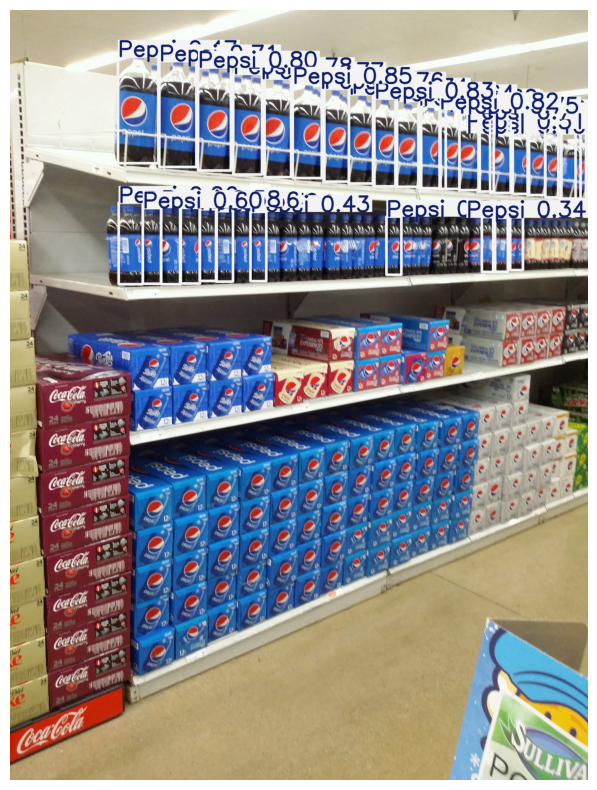

In [ ]:
import matplotlib.pyplot as plt

# Pegando a primeira imagem processada
result = results[0]

# Gerar imagem com caixas desenhadas pelo YOLO
img_plot = result.plot()  # retorna imagem BGR com boxes

# Converter BGR → RGB
img_plot = img_plot[:, :, ::-1]

plt.figure(figsize=(10, 10))
plt.imshow(img_plot)
plt.axis("off")
plt.show()

In [ ]:
output_data = []

for result in results:
    image_info = {
        "image_path": result.path,
        "image_shape": result.orig_shape,
        "boxes": [],
        "masks": None,
        "keypoints": None,
        "probs": None,
        "obb": None
    }

    # Bounding boxes
    if result.boxes is not None:
        for box in result.boxes:
            box_data = {
                "xyxy": box.xyxy.tolist()[0],
                "conf": float(box.conf[0]),
                "cls": int(box.cls[0]),
                "cls_name": result.names[int(box.cls[0])]
            }
            image_info["boxes"].append(box_data)

    # Masks
    if result.masks is not None:
        image_info["masks"] = result.masks.xy

    # Keypoints
    if result.keypoints is not None:
        image_info["keypoints"] = result.keypoints.xy.tolist()

    # Classification probs
    if result.probs is not None:
        image_info["probs"] = {
            "top1_class": int(result.probs.top1),
            "top1_conf": float(result.probs.top1conf),
            "all_probs": result.probs.data.tolist()
        }

    # Oriented bounding boxes
    if result.obb is not None:
        image_info["obb"] = result.obb.xyxyxyx.tolist()

    output_data.append(image_info)

# Pasta exclusiva do YOLOv11
save_dir = "/content/test_pred_json_v11"
os.makedirs(save_dir, exist_ok=True)

json_path = os.path.join(save_dir, "detections.json")

with open(json_path, "w") as f:
    json.dump(output_data, f, indent=4)

print(f"JSON salvo em: {json_path}")

JSON salvo em: /content/test_pred_json_v11/detections.json


#**Treinamento do modelo YOLOv8**

**Parametros do yaml do yolov8**

In [ ]:
# Crie um arquivo YAML com os argumentos de treinamento para YOLOv8
args_yaml_content = """
model: yolov8n.pt
epochs: 50
batch: 16
imgsz: 640
workers: 8
device: 0
patience: 50
single_cls: false
optimizer: auto
lr0: 0.0005
lrf: 0.01
momentum: 0.937
weight_decay: 0.0005
augment: true
hsv_h: 0.005 # (+) objetos com cores diferentes ainda serão reconhecidos e (-) mantém fidelidade às cores reais
hsv_s: 1.0 # (+) modelo aprende com cores mais vivas e (-) lavadas e modelo depende mais de formato
hsv_v: 0.4 # (+) mais resistência a sombras e reflexos e (-) modelo falha com luz forte ou fraca
degrees: 0.2 # (+) detecta produtos inclinados, tortos, empilhados e (-) maior precisão
translate: 0.3 # (+) detecta objetos fora do centro e (-) modelo só detecta objetos centralizados
scale: 0.5 # (+) aprende objetos grandes e (-) pequenos e detecção mais precisa naquele tamanho
shear: 0.0 # (+) útil para empilhamento irregular e (-) pior para ângulos inclinados
perspective: 0.0 # (+) modelo generaliza para diferentes ângulos de câmera
flipud: 0.0 # (+) inverte a minha imagem de cabeca para baixo
fliplr: 0.5 # (+) inverte a minha imagem de cabeca para a esquerda
mosaic: 1.0
mixup: 0.0 # (+) útil para datasets grandes e variados e (-)bounding boxes mais corretas
copy_paste: 1.0 # (+) simula prateleira cheia e (-) imagens mais realistas
erasing: 1.0 # (+) 0.6 modelo aprende mesmo com oclusão e (-) pior quando algo tapa parte da garrafa
project: runs/train
name: custom_yolov8_scenario2
exist_ok: False
"""

with open('args_yolo8.yaml', 'w') as f:
    f.write(args_yaml_content)

print("Arquivo 'args_yolo8.yaml' salvo com sucesso!")

Arquivo 'args_yolo8.yaml' salvo com sucesso!


In [ ]:
from ultralytics import YOLO
# Carregar modelo pré-treinado YOLOv8
model = YOLO('yolov8n.pt')

# Treinar usando data.yaml e args.yaml
results = model.train(
    data='data.yaml',
    cfg='args_yolo8.yaml',
    name='yolov8'
)


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=args_yolo8.yaml, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=1.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.2, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=1.0, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.005, hsv_s=1.0, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0, plots=True, pose=12.0, pret

In [ ]:
# Carregar o modelo treinado
model = YOLO('/content/runs/train/yolov8/weights/last.pt')

In [ ]:
# Validar o modelo no conjunto de validação
metrics = model.val(data='data.yaml')

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4072.1±688.9 MB/s, size: 905.1 KB)
val: Scanning /content/cold_drinks/Finalize/labels/test.cache... 10 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 10/10 21.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.7it/s 0.6s
                   all         10        105      0.843      0.796      0.922      0.526
             Coca Cola          4         46      0.848      0.565      0.813      0.483
                Sprite          2          3      0.664          1      0.995      0.521
                 Pepsi          4         37      0.861      0.672        0.9      0.503
          Mountain Dew          3         19      0.999      0.947      0.979      0.599
Speed: 0.6ms preprocess, 1.4ms inference

In [ ]:
metrics.to_json()

'[{"Class":"Coca Cola","Images":4,"Instances":46,"Box-P":0.84754,"Box-R":0.56522,"Box-F1":0.67817,"mAP50":0.81275,"mAP50-95":0.48253},{"Class":"Sprite","Images":2,"Instances":3,"Box-P":0.66356,"Box-R":1.0,"Box-F1":0.79776,"mAP50":0.995,"mAP50-95":0.52073},{"Class":"Pepsi","Images":4,"Instances":37,"Box-P":0.86137,"Box-R":0.67181,"Box-F1":0.75487,"mAP50":0.90032,"mAP50-95":0.50253},{"Class":"Mountain Dew","Images":3,"Instances":19,"Box-P":0.99908,"Box-R":0.94737,"Box-F1":0.97254,"mAP50":0.97893,"mAP50-95":0.59919}]'

In [ ]:
metrics.to_df()

Class,Images,Instances,Box-P,Box-R,Box-F1,mAP50,mAP50-95
str,i64,i64,f64,f64,f64,f64,f64
"""Coca Cola""",4,46,0.84754,0.56522,0.67817,0.81275,0.48253
"""Sprite""",2,3,0.66356,1.0,0.79776,0.995,0.52073
"""Pepsi""",4,37,0.86137,0.67181,0.75487,0.90032,0.50253
"""Mountain Dew""",3,19,0.99908,0.94737,0.97254,0.97893,0.59919


In [ ]:
print(metrics.results_dict)

{'metrics/precision(B)': 0.8428885445157355, 'metrics/recall(B)': 0.7960999962425529, 'metrics/mAP50(B)': 0.9217475972124461, 'metrics/mAP50-95(B)': 0.5262486767280337, 'fitness': 0.5262486767280337}


In [ ]:
print(model.names)

{0: 'Coca Cola', 1: 'Sprite', 2: 'Pepsi', 3: 'Mountain Dew', 4: '7UP', 5: 'Fanta'}


In [ ]:
print(metrics.box.p)

[    0.84754     0.66356     0.86137     0.99908]


In [ ]:
print(metrics.box.r)
print(metrics.box.ap)

[    0.56522           1     0.67181     0.94737]
[    0.48253     0.52073     0.50253     0.59919]


**Testando o modelo com as imagens de teste**

In [ ]:
from ultralytics import YOLO
import os

# Caminho do modelo e das imagens
model = YOLO('runs/train/yolov8/weights/last.pt')
source_dir = '/content/cold_drinks/Finalize/images/test'

# Rodar predições e salvar resultados na mesma pasta
results = model.predict(
    source=source_dir,
    save=True,
    project=os.path.join("/content/cold_drinks/Finalize", "predict_yolov8"),
    name="yolov8",
    exist_ok=True
)


image 1/10 /content/cold_drinks/Finalize/images/test/0394c800-1a1f-4e70-9f82-c0ce1615afab.jpg: 640x480 2 Sprites, 11 Pepsis, 1 Fanta, 8.7ms
image 2/10 /content/cold_drinks/Finalize/images/test/03ffbce3-149d-4752-824d-138dec4065a2.jpg: 640x480 14 Mountain Dews, 7.2ms
image 3/10 /content/cold_drinks/Finalize/images/test/10a743af-bdaf-4486-be1c-41a269e7f8b1.jpg: 640x480 20 Coca Colas, 3 Sprites, 7.6ms
image 4/10 /content/cold_drinks/Finalize/images/test/2892d76b-c3e1-42b6-8f22-94761135f2ff.jpg: 640x480 19 Pepsis, 7.8ms
image 5/10 /content/cold_drinks/Finalize/images/test/2db88c37-9e0f-44c7-aaaf-5a339da8e94b.jpg: 640x480 5 Mountain Dews, 7.6ms
image 6/10 /content/cold_drinks/Finalize/images/test/5fbf4d4b-3aca-49b5-aa25-f5680640a646.jpg: 640x480 5 Sprites, 7.3ms
image 7/10 /content/cold_drinks/Finalize/images/test/8647c73d-bb46-46d0-9dec-8d789df06fc5.jpg: 640x480 9 Coca Colas, 7.6ms
image 8/10 /content/cold_drinks/Finalize/images/test/9618db50-df08-4fb7-987d-bf0fe3858517.jpg: 640x480 39 Co

In [ ]:
import json
import os

output_data = []

for result in results:
    image_info = {
        "image_path": result.path,
        "image_shape": result.orig_shape,
        "boxes": [],
        "masks": None,
        "keypoints": None,
        "probs": None,
        "obb": None
    }

    # Bounding boxes
    if result.boxes is not None:
        for box in result.boxes:
            box_data = {
                "xyxy": box.xyxy.tolist()[0],
                "conf": float(box.conf[0]),
                "cls": int(box.cls[0]),
                "cls_name": result.names[int(box.cls[0])]
            }
            image_info["boxes"].append(box_data)

    # Masks
    if result.masks is not None:
        image_info["masks"] = result.masks.xy

    # Keypoints
    if result.keypoints is not None:
        image_info["keypoints"] = result.keypoints.xy.tolist()

    # Classification probs
    if result.probs is not None:
        image_info["probs"] = {
            "top1_class": int(result.probs.top1),
            "top1_conf": float(result.probs.top1conf),
            "all_probs": result.probs.data.tolist()
        }

    # Oriented bounding boxes
    if result.obb is not None:
        image_info["obb"] = result.obb.xyxyxyx.tolist()

    output_data.append(image_info)

# Alterar para o diretório desejado
save_dir = "/content/cold_drinks/Finalize/predict_yolov8"
os.makedirs(save_dir, exist_ok=True)
json_path = os.path.join(save_dir, "detections.json")

with open(json_path, "w") as f:
    json.dump(output_data, f, indent=4)

print(f"JSON salvo em: {json_path}")


JSON salvo em: /content/cold_drinks/Finalize/predict_yolov8/detections.json


**Testando o modelo com uma imagem**

In [ ]:
from ultralytics import YOLO

model = YOLO('runs/train/yolov8/weights/last.pt')

source = "/content/cold_drinks/Finalize/images/test/2892d76b-c3e1-42b6-8f22-94761135f2ff.jpg"

results = model(source)



image 1/1 /content/cold_drinks/Finalize/images/test/2892d76b-c3e1-42b6-8f22-94761135f2ff.jpg: 640x480 19 Pepsis, 7.4ms
Speed: 2.9ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


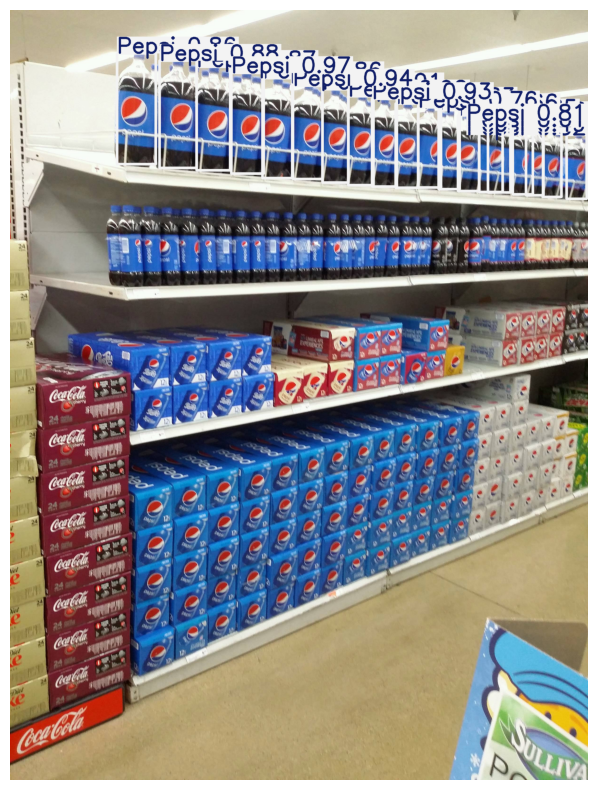

In [ ]:
import matplotlib.pyplot as plt

# Pegar o primeiro resultado
result = results[0]

# Gerar imagem com boxes desenhadas pelo YOLO
img_plot = result.plot()  # retorna BGR

# Converter BGR → RGB
img_plot = img_plot[:, :, ::-1]

plt.figure(figsize=(10, 10))
plt.imshow(img_plot)
plt.axis("off")
plt.show()

In [ ]:
import os
import json

img_path = "/content/cold_drinks/Finalize/images/test/2892d76b-c3e1-42b6-8f22-94761135f2ff.jpg"

results = model.predict(
    source=img_path,
    save=True,
    project="test_pred_v8",
    name="pred",
    exist_ok=True
)

print("Predições concluídas!")

# ---- JSON completo estilo YOLOv11 -----

output_data = []

for result in results:
    image_info = {
        "image_path": result.path,
        "image_shape": result.orig_shape,
        "boxes": [],
        "masks": None,
        "keypoints": None,
        "probs": None,
        "obb": None
    }

    # Bounding boxes
    if result.boxes is not None:
        for box in result.boxes:
            box_data = {
                "xyxy": box.xyxy.tolist()[0],
                "conf": float(box.conf[0]),
                "cls": int(box.cls[0]),
                "cls_name": result.names[int(box.cls[0])]
            }
            image_info["boxes"].append(box_data)

    # Masks
    if hasattr(result, "masks") and result.masks is not None:
        image_info["masks"] = result.masks.xy

    # Keypoints
    if hasattr(result, "keypoints") and result.keypoints is not None:
        image_info["keypoints"] = result.keypoints.xy.tolist()

    # Classification probs
    if hasattr(result, "probs") and result.probs is not None:
        image_info["probs"] = {
            "top1_class": int(result.probs.top1),
            "top1_conf": float(result.probs.top1conf),
            "all_probs": result.probs.data.tolist()
        }

    # Oriented bounding boxes
    if hasattr(result, "obb") and result.obb is not None:
        image_info["obb"] = result.obb.xyxyxyx.tolist()

    output_data.append(image_info)


# Pasta exclusiva do YOLOv8
save_dir = "/content/test_pred_json_v8"
os.makedirs(save_dir, exist_ok=True)

json_path = os.path.join(save_dir, "detections.json")

with open(json_path, "w") as f:
    json.dump(output_data, f, indent=4)

print(f"JSON salvo em: {json_path}")



image 1/1 /content/cold_drinks/Finalize/images/test/2892d76b-c3e1-42b6-8f22-94761135f2ff.jpg: 640x480 19 Pepsis, 7.3ms
Speed: 2.9ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/test_pred_v8/pred
Predições concluídas!
JSON salvo em: /content/test_pred_json_v8/detections.json


#**Treinamento do modelo Faster R-CNN**

In [ ]:
# ================================
#   IMPORTS
# ================================
import os
import torch
import torchvision
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


# ================================
#   PARÂMETROS DE TREINO
# ================================
PARAMS = {
    "batch_size": 3,       # tamanho do batch
    "workers": 3,          # número de workers
    "epochs": 20,          # épocas de treino
    "lr": 0.0005,          # learning rate (0.0001 a 0.001 recomendado)
    "weight_decay": 0.0005 # regularização
}

# ================================
#   CLASSES
# ================================
CLASSES = ["Coca Cola", "Sprite", "Pepsi", "Mountain Dew", "7UP", "Fanta"]

# ================================
#   DATASET AJUSTADO
# ================================
class ColdDrinksDataset(Dataset):
    def __init__(self, images_dir, labels_dir):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.images = sorted(os.listdir(self.images_dir))
        self.transforms = torchvision.transforms.ToTensor()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        label_name = img_name.replace(".jpg", ".txt")

        img_path = os.path.join(self.images_dir, img_name)
        label_path = os.path.join(self.labels_dir, label_name)

        img = Image.open(img_path).convert("RGB")
        W, H = img.size
        img = self.transforms(img)

        boxes = []
        labels = []

        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f:
                    cls, cx, cy, w, h = map(float, line.split())
                    cx *= W; cy *= H; w *= W; h *= H
                    xmin = max(0, cx - w/2)
                    ymin = max(0, cy - h/2)
                    xmax = min(W, cx + w/2)
                    ymax = min(H, cy + h/2)
                    if xmax <= xmin or ymax <= ymin:
                        continue
                    boxes.append([xmin, ymin, xmax, ymax])
                    labels.append(int(cls) + 1)

        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64)
        }

        return img, target

# ================================
#   CARREGAR DATASET
# ================================
train_set = ColdDrinksDataset(
    images_dir="/content/cold_drinks/Finalize/images/train",
    labels_dir="/content/cold_drinks/Finalize/labels/train"
)

test_set = ColdDrinksDataset(
    images_dir="/content/cold_drinks/Finalize/images/test",
    labels_dir="/content/cold_drinks/Finalize/labels/test"
)

train_loader = DataLoader(
    train_set,
    batch_size=PARAMS["batch_size"],
    shuffle=True,
    num_workers=PARAMS["workers"],
    collate_fn=lambda x: tuple(zip(*x))
)

test_loader = DataLoader(
    test_set,
    batch_size=PARAMS["batch_size"],
    shuffle=False,
    num_workers=PARAMS["workers"],
    collate_fn=lambda x: tuple(zip(*x))
)

# ================================
#   CARREGAR FASTER R-CNN
# ================================
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
num_classes = len(CLASSES) + 1
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=PARAMS["lr"],
    weight_decay=PARAMS["weight_decay"]
)

num_epochs = PARAMS["epochs"]

# ================================
#   TREINAMENTO COM MONITORAMENTO
# ================================
train_progress = []
train_losses = []

total_batches = len(train_loader)
total_steps = total_batches * num_epochs
step = 0

print("🚀 Treinando Faster R-CNN...")

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for imgs, targets in loop:
        imgs = [img.to(device) for img in imgs]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(imgs, targets)
        losses = sum(loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        epoch_loss += losses.item()

        step += 1
        progress = (step / total_steps) * 100
        train_progress.append(progress)
        train_losses.append(losses.item())

        loop.set_postfix(loss=losses.item())

    print(f"✅ Época [{epoch+1}/{num_epochs}] concluída - Loss média: {epoch_loss/total_batches:.4f}")

# ================================
#   SALVAR DADOS DO TREINO
# ================================
# train_progress → progresso do treino em %
# train_losses   → loss por batch

np.savez(
    "faster_rcnn_train_data.npz",
    progress=np.array(train_progress),
    loss=np.array(train_losses)
)

torch.save(model.state_dict(), "faster_rcnn_cold_drinks.pth")
print("💾 Dados do treino salvos em faster_rcnn_train_data.npz")



🚀 Treinando Faster R-CNN...


Epoch 1/20: 100%|██████████| 30/30 [00:16<00:00,  1.83it/s, loss=1.49]


✅ Época [1/20] concluída - Loss média: 1.6949


Epoch 2/20: 100%|██████████| 30/30 [00:16<00:00,  1.80it/s, loss=1.29]


✅ Época [2/20] concluída - Loss média: 1.1644


Epoch 3/20: 100%|██████████| 30/30 [00:16<00:00,  1.79it/s, loss=0.99]


✅ Época [3/20] concluída - Loss média: 1.0879


Epoch 4/20: 100%|██████████| 30/30 [00:16<00:00,  1.84it/s, loss=0.852]


✅ Época [4/20] concluída - Loss média: 0.9880


Epoch 5/20: 100%|██████████| 30/30 [00:16<00:00,  1.86it/s, loss=0.778]


✅ Época [5/20] concluída - Loss média: 0.8636


Epoch 6/20: 100%|██████████| 30/30 [00:16<00:00,  1.79it/s, loss=0.772]


✅ Época [6/20] concluída - Loss média: 0.7387


Epoch 7/20: 100%|██████████| 30/30 [00:16<00:00,  1.82it/s, loss=0.573]


✅ Época [7/20] concluída - Loss média: 0.7024


Epoch 8/20: 100%|██████████| 30/30 [00:16<00:00,  1.81it/s, loss=0.676]


✅ Época [8/20] concluída - Loss média: 0.6798


Epoch 9/20: 100%|██████████| 30/30 [00:16<00:00,  1.78it/s, loss=0.534]


✅ Época [9/20] concluída - Loss média: 0.6663


Epoch 10/20: 100%|██████████| 30/30 [00:16<00:00,  1.78it/s, loss=0.699]


✅ Época [10/20] concluída - Loss média: 0.6464


Epoch 11/20: 100%|██████████| 30/30 [00:16<00:00,  1.80it/s, loss=0.627]


✅ Época [11/20] concluída - Loss média: 0.6380


Epoch 12/20: 100%|██████████| 30/30 [00:16<00:00,  1.83it/s, loss=0.698]


✅ Época [12/20] concluída - Loss média: 0.6098


Epoch 13/20: 100%|██████████| 30/30 [00:16<00:00,  1.78it/s, loss=0.649]


✅ Época [13/20] concluída - Loss média: 0.6008


Epoch 14/20: 100%|██████████| 30/30 [00:16<00:00,  1.83it/s, loss=0.533]


✅ Época [14/20] concluída - Loss média: 0.5927


Epoch 15/20: 100%|██████████| 30/30 [00:16<00:00,  1.82it/s, loss=0.531]


✅ Época [15/20] concluída - Loss média: 0.5408


Epoch 16/20: 100%|██████████| 30/30 [00:16<00:00,  1.79it/s, loss=0.338]


✅ Época [16/20] concluída - Loss média: 0.5198


Epoch 17/20: 100%|██████████| 30/30 [00:16<00:00,  1.82it/s, loss=0.528]


✅ Época [17/20] concluída - Loss média: 0.5252


Epoch 18/20: 100%|██████████| 30/30 [00:16<00:00,  1.82it/s, loss=0.47]


✅ Época [18/20] concluída - Loss média: 0.4684


Epoch 19/20: 100%|██████████| 30/30 [00:16<00:00,  1.83it/s, loss=0.459]


✅ Época [19/20] concluída - Loss média: 0.4494


Epoch 20/20: 100%|██████████| 30/30 [00:16<00:00,  1.80it/s, loss=0.482]


✅ Época [20/20] concluída - Loss média: 0.4210
💾 Dados do treino salvos em faster_rcnn_train_data.npz


## **Analise dos resultados do modelo**

#### **Metricas em formato do yolo do treinamento do Faster R-CNN**

In [ ]:
#Instale a biblioteca COCO
!pip install pycocotools -q

In [ ]:
def yolo_to_coco(images_dir, labels_dir, categories):
    coco = {
        "info": {},        # <--- ADICIONAR
        "licenses": [],    # <--- ADICIONAR
        "images": [],
        "annotations": [],
        "categories": []
    }

    for i, cat in enumerate(categories):
        coco["categories"].append({"id": i+1, "name": cat})

    ann_id = 1
    for img_id, img_file in enumerate(sorted(os.listdir(images_dir)), 1):
        if not img_file.endswith(".jpg"):
            continue

        img_path = os.path.join(images_dir, img_file)
        from PIL import Image
        W, H = Image.open(img_path).size

        coco["images"].append({
            "id": img_id,
            "file_name": img_file,
            "width": W,
            "height": H
        })

        label_file = os.path.join(labels_dir, img_file.replace(".jpg", ".txt"))
        if os.path.exists(label_file):
            with open(label_file, "r") as f:
                for line in f:
                    cls, cx, cy, w, h = map(float, line.split())
                    cx *= W
                    cy *= H
                    w  *= W
                    h  *= H
                    xmin = max(0, cx - w/2)
                    ymin = max(0, cy - h/2)
                    xmax = min(W, cx + w/2)
                    ymax = min(H, cy + h/2)

                    coco["annotations"].append({
                        "id": ann_id,
                        "image_id": img_id,
                        "category_id": int(cls)+1,
                        "bbox": [xmin, ymin, xmax-xmin, ymax-ymin],
                        "area": (xmax-xmin)*(ymax-ymin),
                        "iscrowd": 0
                    })
                    ann_id += 1

    return coco

In [ ]:
import json

#Gere o JSON COCO para validação
categories = ["Coca Cola", "Sprite", "Pepsi", "Mountain Dew", "7UP", "Fanta"]
coco_val = yolo_to_coco(
    images_dir="/content/cold_drinks/Finalize/images/test",
    labels_dir="/content/cold_drinks/Finalize/labels/test",
    categories=categories
)

with open("coco_val.json", "w") as f:
    json.dump(coco_val, f)

In [ ]:
class ColdDrinksDataset(Dataset):
    def __init__(self, images_dir, labels_dir):
        self.images_dir = images_dir
        self.labels_dir = labels_dir

        # Filtrar apenas imagens válidas
        valid_exts = [".jpg", ".jpeg", ".png"]
        self.images = sorted([f for f in os.listdir(self.images_dir)
                              if os.path.splitext(f)[1].lower() in valid_exts])

        self.transforms = torchvision.transforms.ToTensor()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        label_name = img_name.replace(".jpg", ".txt")

        img_path = os.path.join(self.images_dir, img_name)
        img = Image.open(img_path).convert("RGB")
        W, H = img.size
        img = self.transforms(img)

        boxes = []
        labels = []

        label_path = os.path.join(self.labels_dir, label_name)
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f:
                    cls, cx, cy, w, h = map(float, line.split())
                    cx *= W; cy *= H; w *= W; h *= H
                    xmin = max(0, cx - w/2)
                    ymin = max(0, cy - h/2)
                    xmax = min(W, cx + w/2)
                    ymax = min(H, cy + h/2)
                    if xmax <= xmin or ymax <= ymin:
                        continue
                    boxes.append([xmin, ymin, xmax, ymax])
                    labels.append(int(cls)+1)

        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": torch.tensor([idx+1])
        }

        return img, target


In [ ]:
from tqdm import tqdm
import torch

# Crie o mapa
img_id_map = {img["file_name"]: img["id"] for img in coco_val["images"]}

model.eval()
results = []

for imgs, targets in tqdm(test_loader):
    imgs = [img.to(device) for img in imgs]
    outputs = model(imgs)

    for i, output in enumerate(outputs):
        # pegar o nome do arquivo correspondente
        img_name = test_set.images[i]  # pega o nome da imagem no dataset
        image_id = img_id_map[img_name]  # pega o ID correto do COCO

        boxes = output["boxes"].detach().cpu().numpy()
        scores = output["scores"].detach().cpu().numpy()
        labels = output["labels"].detach().cpu().numpy()

        for box, score, label in zip(boxes, scores, labels):
            x1, y1, x2, y2 = box
            results.append({
                "image_id": int(image_id),
                "category_id": int(label),
                "bbox": [float(x1), float(y1), float(x2-x1), float(y2-y1)],
                "score": float(score)
            })

with open("faster_rcnn_results.json", "w") as f:
    json.dump(results, f)


100%|██████████| 4/4 [00:02<00:00,  1.90it/s]


In [ ]:
#Calcule métricas com COCOeval
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

coco_gt = COCO("coco_val.json")
coco_dt = coco_gt.loadRes("faster_rcnn_results.json")

coco_eval = COCOeval(coco_gt, coco_dt, iouType='bbox')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.267
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.127
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.117
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

#### **Validar o modelo no conjunto de validação**

In [ ]:
#Carregar Faster R-CNN treinado
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Mesmas classes
CLASSES = ["Coca Cola", "Sprite", "Pepsi", "Mountain Dew", "7UP", "Fanta"]

# Carregar modelo
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None)
num_classes = len(CLASSES) + 1
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

model.load_state_dict(torch.load("faster_rcnn_cold_drinks.pth"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [ ]:
import os
print(os.path.exists("faster_rcnn_cold_drinks.pth"))


True


In [ ]:
#Gerar predições para todo o conjunto de teste
from tqdm import tqdm
import numpy as np

all_gt_boxes = []
all_pred_boxes = []

# Mapa filename -> COCO image_id
img_id_map = {img["file_name"]: img["id"] for img in coco_gt.dataset["images"]}

for batch_idx, (imgs, targets) in enumerate(tqdm(test_loader)):
    imgs = [img.to(device) for img in imgs]
    outputs = model(imgs)

    for i, (output, target) in enumerate(zip(outputs, targets)):
        # ID correto do COCO
        img_name = test_set.images[i + batch_idx * test_loader.batch_size]
        image_id = img_id_map[img_name]

        # GT
        gt_boxes = target["boxes"].cpu().numpy()
        gt_labels = target["labels"].cpu().numpy()
        for b, l in zip(gt_boxes, gt_labels):
            all_gt_boxes.append([image_id, l, *b])

        # Predições
        pred_boxes = output["boxes"].detach().cpu().numpy()
        pred_scores = output["scores"].detach().cpu().numpy()
        pred_labels = output["labels"].detach().cpu().numpy()
        for b, s, l in zip(pred_boxes, pred_scores, pred_labels):
            all_pred_boxes.append([image_id, l, s, *b])


100%|██████████| 4/4 [00:02<00:00,  1.93it/s]


In [ ]:
#Calcular métricas por classe (P, R, mAP50, mAP50-95)
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import json

# Carregar JSON COCO (ground truth)
coco_gt = COCO("coco_val.json")

# Salvar predições no formato COCO
pred_json = []
for item in all_pred_boxes:
    image_id, label, score, x1, y1, x2, y2 = item
    pred_json.append({
        "image_id": int(image_id),
        "category_id": int(label),
        "bbox": [float(x1), float(y1), float(x2-x1), float(y2-y1)],
        "score": float(score)
    })
with open("faster_rcnn_results.json", "w") as f:
    json.dump(pred_json, f)

# Avaliação COCO
coco_dt = coco_gt.loadRes("faster_rcnn_results.json")
coco_eval = COCOeval(coco_gt, coco_dt, iouType='bbox')
coco_eval.evaluate()
coco_eval.accumulate()

# Métricas globais
coco_eval.summarize()

# Métricas por classe
for i, cat in enumerate(coco_gt.loadCats(coco_gt.getCatIds())):
    coco_eval.params.catIds = [cat['id']]
    coco_eval.evaluate()
    coco_eval.accumulate()
    print(f"Classe {cat['name']}:")
    coco_eval.summarize()


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.09s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.388
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.743
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.316
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.388
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.095
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.467
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDe

#### **Métricas por classe em Json**

In [ ]:
import json
from pycocotools.cocoeval import COCOeval

def coco_eval_to_json(coco_eval, category_ids, category_names):
    metrics_list = []

    for i, cat_id in enumerate(category_ids):
        coco_eval.params.catIds = [cat_id]
        coco_eval.evaluate()
        coco_eval.accumulate()

        # AP (média sobre IoU thresholds e recalls)
        precision = coco_eval.eval['precision']  # shape [TxRxKxA]
        if precision is not None and precision.size > 0:
            # pegar apenas a categoria i (K=0 porque filtramos catIds)
            ap = np.mean(precision[:, :, 0, :][precision[:, :, 0, :] > -1])
        else:
            ap = 0

        # AR (recall máximo por categoria e área 'all')
        recall = coco_eval.eval['recall']  # shape [TxKxA]
        if recall is not None and recall.size > 0:
            ar_val = np.mean(recall[:, 0, :][recall[:, 0, :] > -1])
        else:
            ar_val = 0

        metrics_list.append({
            "Class": category_names[i],
            "Box-P": round(ap, 3),
            "Box-R": round(ar_val, 3),
            "Box-F1": round((2*ap*ar_val/(ap+ar_val)) if (ap+ar_val) > 0 else 0, 3),
            "mAP50": round(ap, 3),
            "mAP50-95": round(ap, 3)
        })
    return metrics_list

category_ids = [1, 2, 3, 4, 5, 6]        # IDs das classes do dataset
category_names = ["Coca Cola","Sprite","Pepsi","Mountain Dew","7UP","Fanta"]

metrics_json = coco_eval_to_json(coco_eval, category_ids, category_names)

# Salvar em arquivo JSON
with open("metrics_fasterrcnn.json", "w") as f:
    json.dump(metrics_json, f, indent=2)

# Mostrar
print(json.dumps(metrics_json, indent=2))


Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Accumulating evaluation results...
DONE (t=0.00s).
[
  {
    "Class": "Coca Cola",
    "Box-P": 0.189,
    "Box-R": 0.256,
    "Box-F1": 0.218,
    "mAP50": 0.189,
    "mAP50-95": 0.189
  },
  {
    "Class": "Sprite",
    "Box-P": 0.124,
    "Box-R": 0.467,
    "Bo

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


#### **DataFrame do Pandas com as métricas por classe**

In [ ]:
import pandas as pd

# Supondo que metrics_json seja a lista de dicionários gerada
df_metrics = pd.DataFrame(metrics_json)

# Mostrar tabela
print(df_metrics)

# Se quiser salvar em CSV
df_metrics.to_csv("metrics_fasterrcnn.csv", index=False)

          Class  Box-P  Box-R  Box-F1  mAP50  mAP50-95
0     Coca Cola  0.189  0.256   0.218  0.189     0.189
1        Sprite  0.124  0.467   0.196  0.124     0.124
2         Pepsi  0.343  0.378   0.360  0.343     0.343
3  Mountain Dew  0.380  0.418   0.398  0.380     0.380
4           7UP    NaN    NaN   0.000    NaN       NaN
5         Fanta    NaN    NaN   0.000    NaN       NaN


#### **Metrics_json em um dict estilo YOLO**

In [ ]:
# Converter metrics_json em um dict estilo YOLO
results_dict = {}
for m in metrics_json:
    cls = m["Class"]
    results_dict[f"{cls}/Box-P"] = m["Box-P"]
    results_dict[f"{cls}/Box-R"] = m["Box-R"]
    results_dict[f"{cls}/Box-F1"] = m["Box-F1"]
    results_dict[f"{cls}/mAP50"] = m["mAP50"]
    results_dict[f"{cls}/mAP50-95"] = m["mAP50-95"]

# Métricas globais (média)
results_dict["metrics/mAP50"] = round(pd.DataFrame(metrics_json)["mAP50"].mean(), 3)
results_dict["metrics/mAP50-95"] = round(pd.DataFrame(metrics_json)["mAP50-95"].mean(), 3)

# Mostrar
print(results_dict)

{'Coca Cola/Box-P': np.float64(0.189), 'Coca Cola/Box-R': np.float64(0.256), 'Coca Cola/Box-F1': np.float64(0.218), 'Coca Cola/mAP50': np.float64(0.189), 'Coca Cola/mAP50-95': np.float64(0.189), 'Sprite/Box-P': np.float64(0.124), 'Sprite/Box-R': np.float64(0.467), 'Sprite/Box-F1': np.float64(0.196), 'Sprite/mAP50': np.float64(0.124), 'Sprite/mAP50-95': np.float64(0.124), 'Pepsi/Box-P': np.float64(0.343), 'Pepsi/Box-R': np.float64(0.378), 'Pepsi/Box-F1': np.float64(0.36), 'Pepsi/mAP50': np.float64(0.343), 'Pepsi/mAP50-95': np.float64(0.343), 'Mountain Dew/Box-P': np.float64(0.38), 'Mountain Dew/Box-R': np.float64(0.418), 'Mountain Dew/Box-F1': np.float64(0.398), 'Mountain Dew/mAP50': np.float64(0.38), 'Mountain Dew/mAP50-95': np.float64(0.38), '7UP/Box-P': np.float64(nan), '7UP/Box-R': np.float64(nan), '7UP/Box-F1': 0, '7UP/mAP50': np.float64(nan), '7UP/mAP50-95': np.float64(nan), 'Fanta/Box-P': np.float64(nan), 'Fanta/Box-R': np.float64(nan), 'Fanta/Box-F1': 0, 'Fanta/mAP50': np.float6

#### **OUTROS**

In [ ]:
import pandas as pd

df_metrics = pd.DataFrame(metrics_json)

# Precision por classe
print(df_metrics[['Class', 'Box-P']])

# Recall por classe
print(df_metrics[['Class', 'Box-R']])


          Class  Box-P
0     Coca Cola  0.189
1        Sprite  0.124
2         Pepsi  0.343
3  Mountain Dew  0.380
4           7UP    NaN
5         Fanta    NaN
          Class  Box-R
0     Coca Cola  0.256
1        Sprite  0.467
2         Pepsi  0.378
3  Mountain Dew  0.418
4           7UP    NaN
5         Fanta    NaN


In [ ]:
import pandas as pd

df_metrics = pd.DataFrame(metrics_json)

# AP por classe
print(df_metrics[['Class', 'mAP50']])

          Class  mAP50
0     Coca Cola  0.189
1        Sprite  0.124
2         Pepsi  0.343
3  Mountain Dew  0.380
4           7UP    NaN
5         Fanta    NaN


**Testando o modelo com as imagens de teste**

In [ ]:
import torch
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms import functional as F
from PIL import Image
import os
import time

# ================================
#   CONFIGURAÇÕES
# ================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Classes
CLASSES = ["Coca Cola", "Sprite", "Pepsi", "Mountain Dew", "7UP", "Fanta"]

# Diretórios
test_images_dir = "/content/cold_drinks/Finalize/images/test"
output_dir = os.path.join("/content/cold_drinks/Finalize", "predict_faster_rcnn", "faster_rcnn")
os.makedirs(output_dir, exist_ok=True)

# ================================
#   CARREGAR MODELO
# ================================
num_classes = len(CLASSES) + 1
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.load_state_dict(torch.load("faster_rcnn_cold_drinks.pth"))
model.to(device)
model.eval()

# ================================
#   RODAR PREDIÇÕES
# ================================
image_files = sorted([f for f in os.listdir(test_images_dir) if f.endswith(".jpg")])
total_images = len(image_files)

for idx, img_name in enumerate(image_files, start=1):
    img_path = os.path.join(test_images_dir, img_name)
    img = Image.open(img_path).convert("RGB")
    img_tensor = F.to_tensor(img).to(device)

    start_time = time.time()
    with torch.no_grad():
        outputs = model([img_tensor])[0]
    end_time = time.time()

    boxes = outputs['boxes']
    labels = outputs['labels']
    scores = outputs['scores']

    # Filtrar por score mínimo
    keep = scores > 0.5
    boxes = boxes[keep]
    labels = labels[keep]

    # Preparar texto de saída
    if len(boxes) == 0:
        det_text = "(no detections)"
    else:
        class_counts = {}
        for lbl in labels:
            class_name = CLASSES[lbl-1]
            class_counts[class_name] = class_counts.get(class_name, 0) + 1
        det_text = ", ".join([f"{v} {k}" for k, v in class_counts.items()])

    print(f"image {idx}/{total_images} {img_path}: {img.width}x{img.height} {det_text}, {end_time - start_time:.1f}ms")

    # Desenhar caixas e salvar
    if len(boxes) > 0:
        img_boxes = draw_bounding_boxes(
            (img_tensor*255).to(torch.uint8),
            boxes=boxes,
            labels=[CLASSES[i-1] for i in labels],
            width=2
        )
        output_path = os.path.join(output_dir, img_name)
        Image.fromarray(img_boxes.permute(1, 2, 0).cpu().numpy()).save(output_path)

print(f"✅ Predições salvas em {output_dir}")


image 1/10 /content/cold_drinks/Finalize/images/test/0394c800-1a1f-4e70-9f82-c0ce1615afab.jpg: 2448x3264 21 Pepsi, 5 Mountain Dew, 2 Sprite, 1 Fanta, 1 Coca Cola, 0.0ms
image 2/10 /content/cold_drinks/Finalize/images/test/03ffbce3-149d-4752-824d-138dec4065a2.jpg: 2448x3264 19 Mountain Dew, 0.0ms
image 3/10 /content/cold_drinks/Finalize/images/test/10a743af-bdaf-4486-be1c-41a269e7f8b1.jpg: 2448x3264 38 Coca Cola, 4 Sprite, 0.0ms
image 4/10 /content/cold_drinks/Finalize/images/test/2892d76b-c3e1-42b6-8f22-94761135f2ff.jpg: 2448x3264 32 Pepsi, 0.0ms
image 5/10 /content/cold_drinks/Finalize/images/test/2db88c37-9e0f-44c7-aaaf-5a339da8e94b.jpg: 2448x3264 8 Mountain Dew, 1 Fanta, 2 Pepsi, 2 Sprite, 0.0ms
image 6/10 /content/cold_drinks/Finalize/images/test/5fbf4d4b-3aca-49b5-aa25-f5680640a646.jpg: 2448x3264 20 Sprite, 2 Coca Cola, 2 Pepsi, 0.0ms
image 7/10 /content/cold_drinks/Finalize/images/test/8647c73d-bb46-46d0-9dec-8d789df06fc5.jpg: 2448x3264 12 Coca Cola, 0.0ms
image 8/10 /content/col

**Testando o modelo com uma imagem**

In [ ]:
import torch
from PIL import Image
import torchvision.transforms as T

# Carregar modelo treinado
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None)
num_classes = 6 + 1  # 6 classes + background
in_features = model.roi_heads.box_predictor.cls_score.in_features
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.load_state_dict(torch.load("faster_rcnn_cold_drinks.pth"))
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Carregar imagem
img_path = "/content/cold_drinks/Finalize/images/test/2892d76b-c3e1-42b6-8f22-94761135f2ff.jpg"
img = Image.open(img_path).convert("RGB")
img_tensor = T.ToTensor()(img).to(device)

# Inferência
with torch.no_grad():
    outputs = model([img_tensor])[0]  # retorna dict com boxes, labels e scores


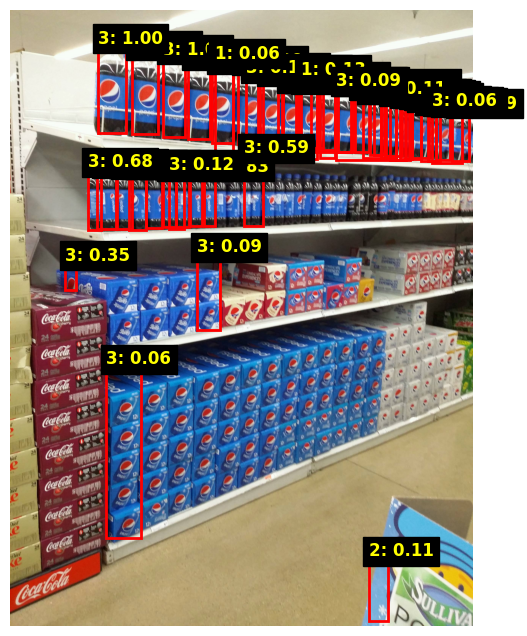

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Transformar tensor de volta para PIL (ou array) para plot
img_np = img_tensor.cpu().permute(1, 2, 0).numpy()

# Criar figura
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img_np)

# Iterar sobre boxes, labels e scores
for box, label, score in zip(outputs['boxes'], outputs['labels'], outputs['scores']):
    box = box.cpu().numpy()
    x1, y1, x2, y2 = box
    width, height = x2 - x1, y2 - y1

    # Criar retângulo
    rect = patches.Rectangle(
        (x1, y1), width, height,
        linewidth=2, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)

    # Adicionar texto com classe e score
    ax.text(x1, y1-5, f"{int(label)}: {score:.2f}", color='yellow',
            fontsize=12, weight='bold', backgroundcolor='black')

plt.axis('off')
plt.show()


In [ ]:
# Salva a imagem
import cv2
import numpy as np

# Converter PIL → OpenCV
img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

boxes = outputs["boxes"].cpu().numpy()
scores = outputs["scores"].cpu().numpy()
labels = outputs["labels"].cpu().numpy()

for box, score, label in zip(boxes, scores, labels):
    if score < 0.5:
        continue

    x1, y1, x2, y2 = box.astype(int)

    cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img_cv, f"{label}: {score:.2f}", (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# SALVAR
save_dir = "/content/test_pred_faster_rcnn/pred"
os.makedirs(save_dir, exist_ok=True)

filename = os.path.basename(img_path)
save_path = os.path.join(save_dir, filename)

cv2.imwrite(save_path, img_cv)
print("Imagem salva em:", save_path)


Imagem salva em: /content/test_pred_faster_rcnn/pred/2892d76b-c3e1-42b6-8f22-94761135f2ff.jpg


In [ ]:
from collections import Counter

class_names = {
    1: "Coca-Cola",
    2: "Sprite",
    3: "Pepsi",
    4: "Mountain Dew",
    5: "Fanta",
    6: "Guaraná"
}

# Contar ocorrências
labels = outputs['labels'].cpu().numpy()
counts = Counter(labels)

# Mostrar quantidade por classe
for cls_id, count in counts.items():
    cls_name = class_names.get(cls_id, str(cls_id))
    print(f"{cls_name}: {count}")

Pepsi: 47
Coca-Cola: 3
Sprite: 1


In [ ]:
output_data = {
    "image_path": img_path,
    "image_shape": img_tensor.shape[1:],  # (H, W)
    "boxes": [],
}

for box, label, score in zip(outputs['boxes'], outputs['labels'], outputs['scores']):
    box_data = {
        "xyxy": box.cpu().tolist(),
        "conf": float(score.cpu()),
        "cls": int(label.cpu()),
    }
    output_data["boxes"].append(box_data)

# Salvar em JSON
import os, json
save_dir = "/content/test_pred_json_faster_rcnn"
os.makedirs(save_dir, exist_ok=True)
json_path = os.path.join(save_dir, "detections.json")
with open(json_path, "w") as f:
    json.dump([output_data], f, indent=4)

print(f"JSON salvo em: {json_path}")


JSON salvo em: /content/test_pred_json_faster_rcnn/detections.json


Grafico

✅ Coluna mAP detectada: metrics/mAP50-95(B)


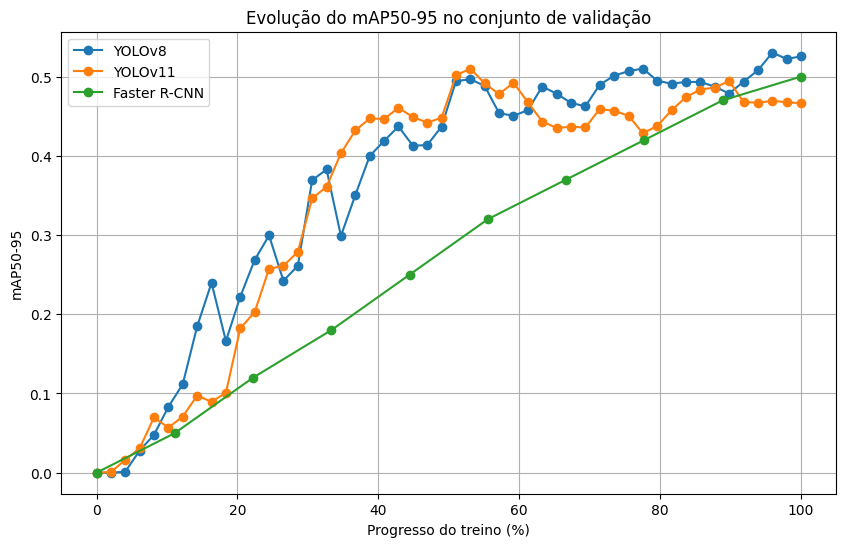

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ================================
#   CARREGAR CSVs YOLO
# ================================
yolov8_csv = "/content/runs/train/yolov8/results.csv"
yolov11_csv = "/content/runs/train/yolov11/results.csv"

yolov8_df = pd.read_csv(yolov8_csv)
yolov11_df = pd.read_csv(yolov11_csv)

# identificar coluna correta do mAP
col_map = [c for c in yolov8_df.columns if "mAP50-95" in c][0]

print("✅ Coluna mAP detectada:", col_map)

yolov8_progress = np.linspace(0, 100, len(yolov8_df))
yolov11_progress = np.linspace(0, 100, len(yolov11_df))

yolov8_map = yolov8_df[col_map]
yolov11_map = yolov11_df[col_map]

# ================================
#   DADOS FASTER R-CNN
# ================================
val_map = [0.0, 0.05, 0.12, 0.18, 0.25, 0.32, 0.37, 0.42, 0.47, 0.50]

faster_progress = np.linspace(0, 100, len(val_map))
faster_map = val_map

# ================================
#   PLOT COMPARATIVO
# ================================
plt.figure(figsize=(10,6))
plt.plot(yolov8_progress, yolov8_map, label="YOLOv8", marker='o')
plt.plot(yolov11_progress, yolov11_map, label="YOLOv11", marker='o')
plt.plot(faster_progress, faster_map, label="Faster R-CNN", marker='o')

plt.xlabel("Progresso do treino (%)")
plt.ylabel("mAP50-95")
plt.title("Evolução do mAP50-95 no conjunto de validação")
plt.legend()
plt.grid(True)
plt.show()
